In [1]:
from IPython.core.display import HTML
HTML("<script>MathJax.Hub.Config({displayAlign: 'left'});</script>")

# Transform Analysis of LTI Systems (Chapter 5)

## Introduction

* We discussed the transforms
    * Discrete-Time Transform
    * $z$-Transform
* This set of notes is about how to use them in the analysis of LTI systems
* Essential background for signal processing

### Review of Key Ideas

* A linear time-invariant (LTI) system is completely characterized by its impulse response, $h[n]$
* Output of the system is given by the convolution sum
\begin{equation}
    y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]
\end{equation}
* If the frequency response exists,
    * $H(z)$ has an ROC that includes unit circle, $z=e^{j\omega}$
then is also a complete characterization
\begin{align}
    h[n] & \Longleftrightarrow H(e^{j\omega}) \\
    Y(e^{j\omega}) &= H(e^{j\omega}) X(e^{j\omega}) \\
\end{align}
* Similarly, with $z$-transform
\begin{align}
    Y(z) = H(z) X(z)
\end{align}
* $H(z)$ is the _system function_
* Any LTI system completely defined by $H(z)$ along with its region of convergence (if exists)
* $h[n]$, $H(e^{j\omega})$, and $H(z)$ with ROC provide many insights into LTI systems    

## 5.1 Frequency Response of LTI Systems

* $H(e^{j\omega})$ is the _frequency response_ of an LTI system
* Can also be thought of as a _complex gain_


### 5.1.1 Phase and Group Delay

In amplitude phase form can express as
\begin{align}
|Y(e^{j\omega})| &= |H(e^{j\omega})| \cdot |X(e^{j\omega})| \\
\angle Y(e^{j\omega}) &= \angle H(e^{j\omega}) + \angle X(e^{j\omega})
\end{align}

* $|H(e^{j\omega})|$ is the _magnitude response_ or _gain_
* $\angle H(e^{j\omega})$ is the _phase response_ or _phase shift_
* Much more intuitive and useful than the real and imaginary parts 
     * We don't normally think of signals or design systems in terms of the even and odd parts of signals

#### Phase
* Phase angle of any complex number is not unique
* Adding any integer multiple of $2\pi$ does not affect the complex number
* The _principal value_ is 
\begin{equation}
    -\pi < \mathrm{ARG}\left[H(e^{j\omega})\right] \leq \pi
\end{equation}
* Plotting the phase (a periodic variable) on a flat piece of surface is tricky
* Jumps of $2\pi$ appear to be discontinuities, but they are not
* The book describes phase without $2\pi$ discontinuities as _unwrapped_

#### Group Delay
\begin{equation}
    \tau(\omega) = \mathrm{grd}\left[H(e^{j\omega})\right] = - \frac{d}{d \omega}{\arg\left[H(e^{j\omega})\right]}
\end{equation}
Or
\begin{equation}
    \mathrm{grd}\left[H(e^{j\omega})\right] = - \frac{d}{d \omega}{\angle H(e^{j\omega})}
\end{equation}

#### Pure Delay
The concept of a "group delay" sense for a system that introduces a pure delay
\begin{align}
    h[n] &= \delta[n-n_d] \\
    H(e^{j\omega}) &= e^{-j\omega n_d} \\
    |H(e^{j\omega})| &= 1 \\
    \angle H(e^{j\omega}) &= -\omega n_d\\
\end{align}

* Pure delay produces a 
    * Frequency response of unit magnitude
    * Phase that is a linear function of frequency
* _Delay distortion_ (linear phase) is tolerable for many applications
    * Simple delays can be dealt with easily by delay in other parts of the system
* Linear phase is therefore often an acceptable substitute for zero-phase
    * Important consideration for design of DT systems
    * We'll see later that we can make the phase more linear at the expense of more delay through the system (lag between output and input)
    * Usually very difficult to make the phase linear or nearly linear with CT systems

**Key idea**:
* Group delay is a bit of a misnomer
     * More appropriately, is a measure of the linearity of the phase
     * Is not really necessarily a literal delay
     * If it was a literal delay, negative values (advances) would imply prediction

**Puzzle**
Consider the causal system
\begin{equation}
    H(z) = \frac{1-bz^{-1}}{1-az^{-1}}
\end{equation}

* Is the system completely specified without an explicit statement of the ROC 
    * Yes - why?
    * The system is causal
* Sketch the pole-zero diagram
* If you had describe this as a filter, what type of filter would it be?

**Narrowband Signals**
* The book gives examples with narrowband signals
* Group delay is negative near the zeros
* Does the signal predict this signal?
     * Sort of - narrowband signals are somewhat predictable

Text(0.5, 1.0, 'Group Delay')

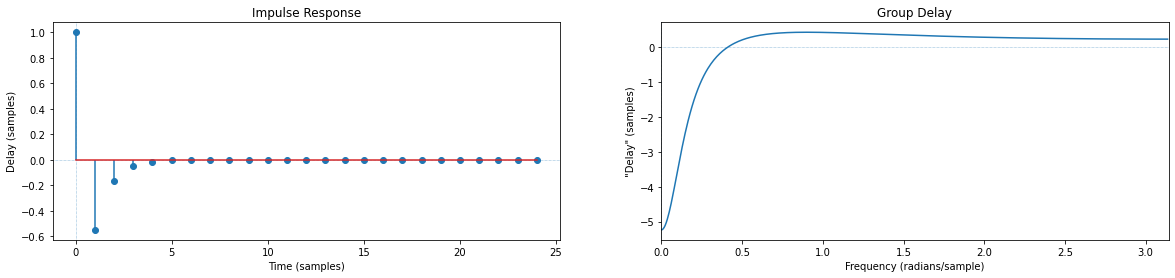

In [29]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

b = np.array([1.0,-0.85])
a = np.array([1.0,-0.30])

w, gd = signal.group_delay((b, a))

firstOrder = signal.dlti(b, a)
n, h = signal.dimpulse(firstOrder, n=25)
h = h[0]

figure = plt.figure()
figure.set_size_inches(20.0,4.0)

axes = figure.add_subplot(121)
axes.axhline(0,linestyle=':',linewidth=0.5)
axes.axvline(0,linestyle=':',linewidth=0.5)
axes.stem(n,h)
axes.set_title('Impulse Response')
axes.set_xlabel('Time (samples)')
axes.set_ylabel('Delay (samples)')

axes = figure.add_subplot(122)
axes.axhline(0,linestyle=':',linewidth=0.5)
axes.axvline(0,linestyle=':',linewidth=0.5)
axes.plot(w, gd)
axes.set_xlim([0,np.pi])
axes.set_xlabel('Frequency (radians/sample)')
axes.set_ylabel('"Delay" (samples)')
axes.set_title('Group Delay')

## 5.2 Linear Constant-Coefficient Difference Equations

\begin{equation}
    \sum_{k=0}^{N} a_k y[n-k] = \sum_{k=0}^{M} b_k x[n-k]
\end{equation}
Then
\begin{align}
    H(z) &= \frac{Y(z)}{X(z)} 
    = \frac{\sum_{k=0}^{M} b_k z^{-k}}{\sum_{k=0}^{N} a_k z^{-k}} 
    = \frac{b_0}{a_0} \frac{\prod_{k=0}^{M} (1-c_k z^{-1})}{\prod_{k=0}^{N} (1-d_k z^{-1})} \\
\end{align}
where the last form is obtained by factoring the polynomials

* Each factor of numerator contributes a zero at $z=c_k$ and a pole at $z=0$
* Each factor of denominator contributes a pole at $z=d_k$ and a zero at $z=0$
* Zeros and poles at $z=0$ can cancel

### 5.2.1 Stability and Causality
Assume we have an LTI system.
* From difference equation, can obtain $H(z)$ but not ROC
* Need more information
* Recall the difference equation (unlike the impulse response) does not completely define the system
     * We can't determine the homogenous solution part of the output signal for a given input signal from the difference equation
* Only requirement for $H(z)$ is that $x(n)$ and $y(n)$ have overlapping ROCs
* Different ROCs will produce different impulse responses
* However, if we know or can assume causality
     * $h[n]$ is right sided
     * ROC stretches towards infinity (hole in the $z$ plane)
     * ROC must be outside the outermost pole
* If the system is stable
     * Impulse response is absolutely summable
     * ROC includes unit circle
* If both causal and stable
     * Outermost pole is inside the unit circle
     * ROC stretches out towards infinity from outermost pole
* Causality and stability are not necessarily compatible requirements for a given $H(z)$ 
     * For a given $H(z)$ and unknown ROC, there may be solutions that are
         * Anti-causal and stable
         * Casual and unstable

### 5.2.2 Inverse Systems
For a given $H(z)$, the inverse is defined such that
\begin{equation*}
    G(z) = H(z) H_i(z) = 1
\end{equation*}
which means
\begin{equation*}
    H_i(z) = \frac{1}{H(z)}
\end{equation*}

In the time domain
\begin{equation*}
    g[n] = h[n] \ast h_i[n] = \delta[n]
\end{equation*}

The frequency response, if it exists, is 
\begin{equation*}
    H_i(e^{j\omega}) = \frac{1}{H_i(e^{j\omega})}
\end{equation*}

The following properties of the inverse system are negatives of the original system:
* Log magnitude
* Phase
* Group delay


#### Rational System Functions
If
\begin{equation*}
    H(z) = \frac{b_0}{a_0} \frac{\prod_{k=0}^{M} (1-c_k z^{-k})}{\prod_{k=0}^{N} (1-d_k z^{-k})} \\
\end{equation*}
then it must be that 
\begin{equation*}
    H_i(z) = \frac{a_0}{b_0} \frac{\prod_{k=0}^{N} (1-d_k z^{-k})}{\prod_{k=0}^{M} (1-c_k z^{-k})} \\
\end{equation*}

* What is the ROC of $H_i(z)$?
* Interesting question
* Must overlap with the ROC of $H(z)$
     * Why?
     * Otherwise $G(z)$ doesn't exist
* There is often more than one valid choice for the ROC of $H_i(z)$
* This means the inverse system may not be unique!
     * Surprising result

#### Causality and Stability
If $H(z)$ is causal
* Inverse must have intersecting ROC

If $H(z)$ is causal and stable AND we want to find an inverse that is also causal and stable, then
* Inverse will only be causal if ROC is region outside outermost zero
* Inverse will only be stable if ROC includes unit circle
* Therefore, inverse only stable if outermost zero (same as outermost pole of inverse) is inside the unit circle

Rational system functions that are stable, causal, and have all the zeros inside the unit circle are called _minimum phase systems_. 
* Inverse is also causal and stable
* Turn out to be very important systems widely used in signal processing design and analysis
* To be discussed more later

### 5.2.3 Impulse Response for Rational Functions
After partial fraction expansion, an $H(z)$ with a rational transfer function with distinct poles can be expressed as
\begin{equation*}
    H(z) = \sum_{r=0}^{M-N} B_r z^{-r} + \sum_{k=1}^{N} \frac{A_k}{1-d_kz^{-1}}
\end{equation*}
where the first term would only be present if $M \geq N$ (the numerator is of higher order than the denominator)

If the system is assumed or known to be causal, then
\begin{equation*}
    h[n] = \sum_{r=0}^{M-N} B_r \delta[n-r] + \sum_{k=1}^{N} A_k d_k^n u[n]
\end{equation*}
where the first term would only be present if $M \geq N$ (the numerator is of higher order than the denominator)

* If $H(z)$ has at least one non-zero pole that is not canceled by a zero
    * $h[n]$ will have at least one term $A_k d_k^n u[n]$
    * $h[n]$ will not have finite length
    * The system will have an _Infinite Impulse Response (IIR)_
* If $H(z)$ has no poles except at $z=0$
    * Partial fraction expansion not possible (or needed)
    * $H(z)$ is just a polynomial in $z^{-1}$
    \begin{equation*}
        H(z) = \sum_{k=0}^{M} b_k z^{-k}
    \end{equation*}
    * $h[n]$ is simply $\sum_{r=0}^{M-N} B_r \delta[n-r]$
    * $h[n]$ response has finite length
    * Is a _Finite Impulse Response (FIR)_ system

## 5.3 Frequency Response for Rational Systems
If a system is LTI, stable, and has a rational transfer function (input and output satisfy a difference equation), then frequency response is
\begin{align*}
    H(e^{j\omega}) &= \frac{\sum_{k=0}^{M} b_k e^{-j \omega k}}{\sum_{k=0}^{N} a_k e^{-j \omega k}}
\end{align*}

If we factor and has distinct poles and zeros, this can also be expressed as
\begin{align*}
    H(e^{j\omega})   &= \left(\frac{b_0}{a_0}\right) \frac{\prod_{k=1}^{M} (1-c_k e^{-j \omega})}{\prod_{k=1}^{N} (1-d_k e^{-j \omega})} \\
    |H(e^{j\omega})| &= \left|\frac{b_0}{a_0}\right| \frac{\prod_{k=1}^{M} |1-c_k e^{-j \omega}|}{\prod_{k=1}^{N} |1-d_k e^{-j \omega}|} \\
    20 \log_{10} |H(e^{j\omega})| &= 20 \log_{10} \left|\frac{b_0}{a_0}\right| \\
    & + \sum_{k=1}^{M} 20 \log_{10} |1-c_k e^{-j \omega}| \\
    & - \sum_{k=1}^{N} 20 \log_{10} |1-d_k e^{-j \omega}| \\
    \arg\left[H(e^{j\omega})\right] &= \arg\left[\frac{b_0}{a_0}\right] \\
    & + \sum_{k=1}^{M} \arg\left[1-c_k e^{-j \omega}\right] \\
    & - \sum_{k=1}^{N} \arg\left[1-d_k e^{-j \omega}\right] \\
    \tau(\omega) &= \sum_{k=1}^{M} \frac{d}{d\omega} \arg\left[1-c_k e^{-j \omega}\right] \\
    & - \sum_{k=1}^{N} \frac{d}{d\omega}  \arg\left[1-d_k e^{-j \omega}\right]
\end{align*}

* Much like a Bode plot, there is a decomposition
* If we understand the effect of a single pole and single zero, we can better understand the whole

### Single Zero

\begin{align*}
    H(z) &= (1-r e^{j\theta} z^{-1}) \\
    &= \frac{z-r e^{j\theta}}{z} && r <1
\end{align*}

### Draw diagram
* Pole zero plot
* Zero at some location
* $v_2$ extends to zero
* $v_1$ extends to point on unit circle at some $\omega$
* $v_3 = v_1 - v_2$

At $z=e^{j\omega}$
\begin{align*}
    H(e^{j\omega}) &= \frac{e^{j\omega}-r e^{j\theta}}{e^{j\omega}}
    = \frac{v_3}{v_1} \\
    |H(e^{j\omega})| &= \frac{|v_3|}{|v_1|} \\
    \angle (1-r e^{j\theta} e^{-j\omega}) &= \angle(e^{j\omega} - r e^{j\theta}) - \angle(e^{j\omega}) \\
    &= \angle(v_3) - \angle(v_1)
\end{align*}

* Magnitude 
    * Proportional to $|v_3|$
    * Smallest when closest to unit circle
    * Largest when furthers from $|v_3|$
* Phase
    * Goes through large phase shift (due to $\phi_3$) near zero
* If you understand this well, you can immediately determine the approximate frequency response from a pole-zero diagram

Average         Delay: 2.0 samples
99th Percentile Delay: 12.0 samples


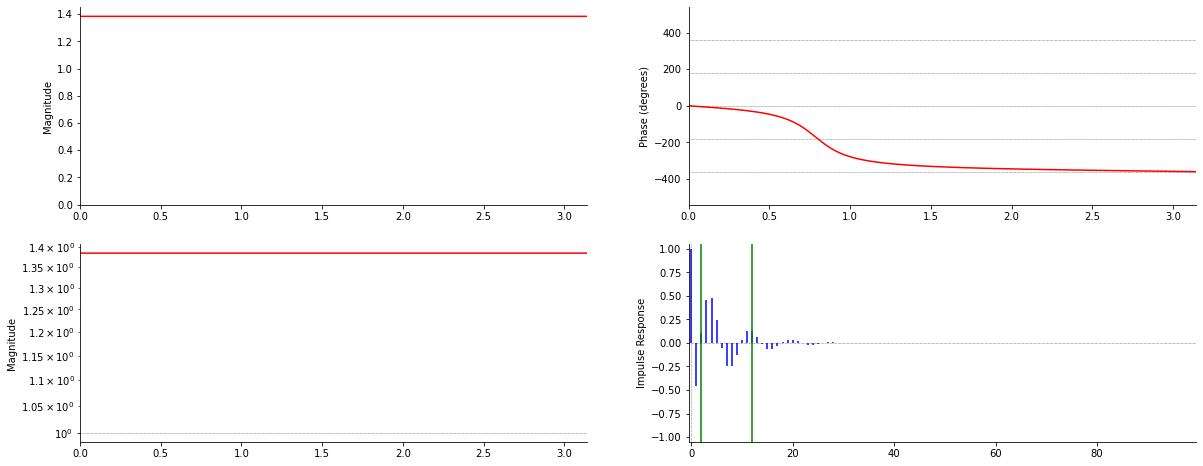

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

zeroAngle1  = 0.25*np.pi
zeroRadius1 = 1/(0.85)

zeroAngle2  = 0.05*np.pi
zeroRadius2 = 0.0

poleAngle1  = 0.25*np.pi
poleRadius1 = 0.85

poleAngle2  = 0.80*np.pi
poleRadius2 = 0.00

zeros = list()
zeros.append(zeroRadius1*np.exp( 1j*zeroAngle1))
zeros.append(zeroRadius1*np.exp(-1j*zeroAngle1))
zeros.append(zeroRadius2*np.exp( 1j*zeroAngle2))
zeros.append(zeroRadius2*np.exp(-1j*zeroAngle2))
poles = list()
poles.append(poleRadius1*np.exp( 1j*poleAngle1))
poles.append(poleRadius1*np.exp(-1j*poleAngle1))
poles.append(poleRadius2*np.exp( 1j*poleAngle2))
poles.append(poleRadius2*np.exp(-1j*poleAngle2))
gain  = 1

system = signal.dlti(zeros,poles,gain)
w,H = signal.dlti.freqresp(system, w=None, n=10000, whole=False)

nh,h = signal.dimpulse(system)
h = np.squeeze(h)
hPower = h**2
delayAverage = np.dot(nh,hPower)/np.sum(hPower)
delay99      = np.where((np.cumsum(hPower)/np.sum(hPower))>0.99)[0][0]

w2,H2 = signal.freqz_zpk(zeros,poles,gain)
angleUnwrapped = (180.0/np.pi)*np.unwrap(np.angle(H))

figure = plt.figure(1)
figure.clf()
figure.set_size_inches(20.0,8.0)

axes1 = figure.add_subplot(221)
axes1.plot(w,abs(H),color='r')
axes1.set_xlim([0,np.pi])
axes1.set_ylim([0,max(abs(H))*1.05])
axes1.set_ylabel('Magnitude')
axes1.spines['right'].set_visible(False)
axes1.spines['top'].set_visible(False)

axes2 = figure.add_subplot(222)
axes2.axhline(   0.0,color='k',linewidth=0.5,linestyle=':')
axes2.axhline( 180.0,color='k',linewidth=0.5,linestyle=':')
axes2.axhline(-180.0,color='k',linewidth=0.5,linestyle=':')
axes2.axhline( 360.0,color='k',linewidth=0.5,linestyle=':')
axes2.axhline(-360.0,color='k',linewidth=0.5,linestyle=':')
axes2.plot(w,angleUnwrapped,color='r')
axes2.set_xlim([0,np.pi])
axes2.set_ylim(max(abs(angleUnwrapped))*np.array([-1.5,1.5]))
axes2.set_ylabel('Phase (degrees)')
axes2.spines['right'].set_visible(False)
axes2.spines['top'].set_visible(False)

axes3 = figure.add_subplot(223)
axes3.axhline(1.0,color='k',linewidth=0.5,linestyle=':')
axes3.semilogy(w,abs(H),color='r')
axes3.set_xlim([0,np.pi])
axes3.set_ylabel('Magnitude')
axes3.spines['right'].set_visible(False)
axes3.spines['top'].set_visible(False)

axes4 = figure.add_subplot(224)
axes4.axhline(0.0,color='k',linewidth=0.5,linestyle=':')
axes4.axvline(0.0,color='k',linewidth=0.5,linestyle=':')
axes4.axvline(delayAverage,color='g',linewidth=1.5)
axes4.axvline(delay99     ,color='g',linewidth=1.5)
axes4.vlines(nh,0,h,color='b')
#axes4.plot(n,h,marker='.',markersize=5,linestyle='none')
axes4.set_xlim([nh.min()-0.5,nh.max()+0.5])
axes4.set_ylabel('Impulse Response')
axes4.set_ylim(max(abs(h))*np.array([-1.05,1.05]))
axes4.spines['right'].set_visible(False)
axes4.spines['top'].set_visible(False)

print('Average         Delay: %3.1f samples' % delayAverage)
print('99th Percentile Delay: %3.1f samples' % delay99)

(-1.2, 1.2, -1.2, 1.2)

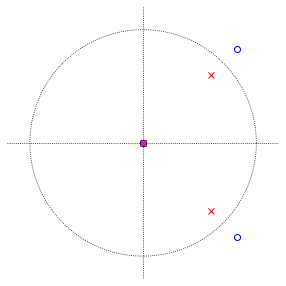

In [31]:
figure = plt.figure()
figure.set_size_inches(20.0,5.0)

axes3 = figure.gca()
t = np.linspace(0,np.pi*2,100)
axes3.plot(np.cos(t), np.sin(t),color='k',linewidth=0.8,linestyle=':')
axes3.axhline(0.0,color='k',linewidth=0.8,linestyle=':')
axes3.axvline(0.0,color='k',linewidth=0.8,linestyle=':')
axes3.plot(np.real(zeros),np.imag(zeros),marker='o',linestyle='none',markerfacecolor='None',color='b',linewidth=0.1)
axes3.plot(np.real(poles),np.imag(poles),marker='x',linestyle='none',color='r',linewidth=0.1)
axes3.set_xlim([-1.2,1.2])
axes3.set_ylim([-1.2,1.2])
axes3.set_aspect('equal')
axes3.set_xlabel('Real')
axes3.set_ylabel('Imaginary')
axes3.axis('off')

## 5.4 Relationship Between Magnitude and Phase

* In general, magnitude response tells you nothing about phase
* If rational system function, there are some constraints on the relationship

## 5.5 All-Pass Systems
Systems with the following stable system function have constant magnitude response
\begin{align*}
    H_{ap}(z) &= \frac{z^{-1}-a^{\ast}}{1-az^{-1}} \\
    H_{ap}(e^{j\omega}) &= \frac{e^{-j\omega}-a^{\ast}}{1-a e^{-j\omega}} \\
    &= e^{-j\omega} \frac{1-a^{\ast} e^{j\omega}}{1-a e^{-j\omega}}\\
    |H_{ap}(e^{j\omega})| &= |e^{-j\omega}| \frac{|1-a^{\ast} e^{j\omega}|}{|1-a e^{-j\omega}|} \\
    & = 1
\end{align*}

* $e^{-j\omega}$ has unit amplitude
* Numerator and denominator are complex conjugates, so same amplitude
* System with magnitude response that is constant is called an __all-pass__ system
* Passes all frequencies with constant gain/attenuation
* All poles and zeros are paired with conjugate reciprocals
* The number of poles matches the number of zeros
* Unwrapped phase is always nonpositive for $0 < \omega < \pi$
* Group delay is always positive

#### Why Important?
* Can be used to shape phase independent of magnitude
* Can help make phase more linear
* Useful in theory of minimum-phase systems
* Can help transform filters (lowpass to other types)
* Examples are coming...

## 5.6 Minimum Phase Systems

Review
* Suppose we have a causal and stable system $H(z)$
* Poles are inside the unit circle
* Zeros might be inside or outside
* Useful sometimes to require the inverse is also causal and stable
* Then the zeros of $H(z)$ must also be inside the unit circle
* Called __minimum phase__ systems

### 5.6.1 Minimum-Phase and All-Pass Decomposition

Any rational system function can be expressed as
\begin{align*}
    H(z) &= H_{\mathrm{min}}(z) H_{\mathrm{ap}}(z)
\end{align*}

For example, if $H(z)$ has a single zero outside the unit circle at $z=1/c^{\ast}$ where $|c|<1$ and all other zeros and poles are inside the unit circle, then $H(z)$ can be written as
\begin{align*}
    H(z) &= H_1(z) (z^{-1}-c^{\ast}) \\
    &= \left(H_1(z) (1-cz^{-1})\right) \frac{z^{-1}-c^{\ast}}{1-cz^{-1}} \\
    &= H_{\mathrm{min}}(z) H_{\mathrm{ap}}(z)
\end{align*}

* Zeros are reflected inside unit circle to conjugate reciprocals of zeros outside unit circle
* Cancelled by poles of the all pass system
* $|H_{\mathrm{min}}(e^{j\omega})| = |H(e^{j\omega})|$


### 5.6.3 Properties of Minimum Phase Systems

#### Minimum Phase-Lag Property

\begin{align*}
    \angle H(z) &= \angle H_{\mathrm{min}}(z) + \angle H_{\mathrm{ap}}(z)
\end{align*}

* Unwrapped phase of all-pass is negative
* Reflecting zeros to their conjugate reciprocal locations 
    * Decreases the phase
    * Increases the negative of the phase (phase lag)
* Of all systems with a given magnitude response $|H(e^{j\omega})|$, $H_{\mathrm{min}}(z)$ has the minimum phase lag
* The word "lag" was dropped, so is just called a __minimum phase system__

#### Minimum Group-Delay Property
\begin{align*}
    \mathrm{grd}[H(e^{j\omega})] &= \mathrm{grd}[H_{\mathrm{min}}(e^{j\omega})] + \mathrm{grd}[H_{\mathrm{ap}}(e^{j\omega})]
\end{align*}

* Group delay is always more than the nonminimum-phase system
* Simply because all-pass system has positive group delay
    * Minimized when all-pass system group delay is zero
* Could be called __minimum group delay system__, but this term is not used in practice


#### Minimum Energy Delay Property
Define the partial energy as
\begin{equation*}
    E[n] = \sum_{m=0}^{n} |h[m]|^2
\end{equation*}
then 
\begin{equation*}
    E[n] \leq E_{\min}[n]
\end{equation*}
* Interpretations
    * Minimum phase systems expend their energy earlier than non-minimum phase systems
    * Partial energy is most concentrated near $n=0$
    * The energy of the system is delayed the least of all systems with the same magnitude
* Sometimes called __minimum energy-delay systems__ or __minimum delay systems__

## 5.7 Generalized Linear Phase

### 5.7.1 Non-Integer Delay

Consider a system with a pure delay
\begin{align*}
    h[n] &= \delta[n-n_d] \\
    H(z) &= z^{-n_d} \\
    H(e^{j\omega}) &= e^{-j\omega n_d}
\end{align*}

Now suppose you have a system with a frequency response of
\begin{align*}
    H(e^{j\omega}) &= e^{-j\omega n_d}
\end{align*}
where $n_d$ is not an integer.

What is the impulse response?
\begin{align*}
    h[n] &= \frac{1}{2\pi} \int_{-\pi}^{\pi} H(e^{j\omega}) e^{j\omega n} d \omega \\
    &= \frac{1}{2\pi} \int_{-\pi}^{\pi} e^{-j\omega n_d} e^{j\omega n} d \omega \\
    &= \frac{1}{2\pi} \int_{-\pi}^{\pi}  e^{j\omega (n-n_d)} d \omega \\
    &= \frac{1}{2\pi} \int_{-\pi}^{\pi}  e^{j\omega (n-n_d)} d \omega \\
    &= \left. \frac{1}{j 2\pi (n-n_d)}  e^{j\omega (n-n_d)}\right|_{-\pi}^{\pi} \\
    &= \frac{e^{j\pi (n-n_d)}-e^{j\pi (n-n_d)}}{j 2\pi (n-n_d)}\\
    &= \frac{2j \sin(\pi (n-n_d))}{j 2\pi (n-n_d)}\\
    &= \frac{\sin(\pi (n-n_d))}{\pi (n-n_d)}\\
\end{align*}

* Note that you would have a very difficult time implementing a continuous-time LTI system with a pure delay
* Trivial in discrete-time
* System is said to have a time shift of $n_d$ samples even if $n_d$ is not an integer
* $n_d>0$: time delay
* $n_d<0$: time advance

#### Linear Phase System
System with a frequency response 
\begin{equation*}
    H(e^{j\omega}) = |H(e^{j\omega})| e^{-j \omega \alpha}
\end{equation*}

If $2 \alpha$ is an integer, impulse response has even symmetry about $\alpha$
\begin{equation*}
    h[2\alpha-n] = h[n]
\end{equation*}

Otherwise, impulse response will not have symmetry

### 5.7.2 Generalized Linear Phase
A system is a __generalized linear-phase system__ if its frequency response can be expressed in the form
\begin{equation*}
    H(e^{j\omega}) = A(e^{j\omega}) e^{-j \omega \alpha + j\beta}
\end{equation*}
where $A(e^{j\omega})$ is real (possibly bipolar)

If we ignore discontinuities in the phase (180$^o$ or 360$^o$), this means the group delay is constant
\begin{equation*}
    \tau(\omega) = \alpha
\end{equation*}
and the phase is linear
\begin{equation*}
    \arg[H(e^{j\omega})] = \beta - \omega \alpha
\end{equation*}


#### Example
Consider a bandlimited version of a continuous-time differentiator
\begin{equation*}
    H(j\Omega) = j \Omega
\end{equation*}

* Amplitude is linear
* Phase is $\pm \pi$
* Draw frequency response

#### Summary
* FIR systems are nice to work with partly because we can easily design them to have linear phase
* IIR systems ususally have nonlinear phase
    * Can be partly compensated for with all-pass system